In [85]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [86]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [87]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [88]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [89]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [90]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [91]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [92]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | mehamn
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kachug
Processing Record 5 of Set 1 | hambantota
Processing Record 6 of Set 1 | yunjinghong
City not found. Skipping...
Processing Record 7 of Set 1 | jazzin
City not found. Skipping...
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | umm kaddadah
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | ostrovnoy
Processing Record 19 of Set 1 | coro
Processing Record 20 of Set 1 | newport
Processing Record 21 of 

In [93]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [94]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.72,67,97,15.19,KI,2021-09-22 22:28:27
1,Mehamn,71.0357,27.8492,47.50,83,100,23.98,NO,2021-09-22 22:28:27
2,Rikitea,-23.1203,-134.9692,73.47,75,38,19.53,PF,2021-09-22 22:28:28
3,Kachug,53.9606,105.8817,34.20,93,63,2.68,RU,2021-09-22 22:28:28
4,Hambantota,6.1241,81.1185,79.99,83,40,14.67,LK,2021-09-22 22:28:28
5,Saint-Philippe,-21.3585,55.7679,67.55,83,43,11.05,RE,2021-09-22 22:28:29
6,Albany,42.6001,-73.9662,76.64,78,88,11.10,US,2021-09-22 22:26:18
7,Ushuaia,-54.8000,-68.3000,44.22,87,75,28.77,AR,2021-09-22 22:28:30
8,Tuktoyaktuk,69.4541,-133.0374,35.60,64,75,18.41,CA,2021-09-22 22:28:30
9,Nikolskoye,59.7035,30.7861,46.29,72,100,3.11,RU,2021-09-22 22:28:30


In [95]:
# put in new column order
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-09-22 22:28:27,3.0707,172.7902,82.72,67,97,15.19
1,Mehamn,NO,2021-09-22 22:28:27,71.0357,27.8492,47.50,83,100,23.98
2,Rikitea,PF,2021-09-22 22:28:28,-23.1203,-134.9692,73.47,75,38,19.53
3,Kachug,RU,2021-09-22 22:28:28,53.9606,105.8817,34.20,93,63,2.68
4,Hambantota,LK,2021-09-22 22:28:28,6.1241,81.1185,79.99,83,40,14.67
5,Saint-Philippe,RE,2021-09-22 22:28:29,-21.3585,55.7679,67.55,83,43,11.05
6,Albany,US,2021-09-22 22:26:18,42.6001,-73.9662,76.64,78,88,11.10
7,Ushuaia,AR,2021-09-22 22:28:30,-54.8000,-68.3000,44.22,87,75,28.77
8,Tuktoyaktuk,CA,2021-09-22 22:28:30,69.4541,-133.0374,35.60,64,75,18.41
9,Nikolskoye,RU,2021-09-22 22:28:30,59.7035,30.7861,46.29,72,100,3.11


In [96]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [97]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

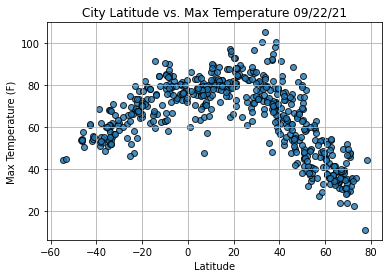

In [98]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

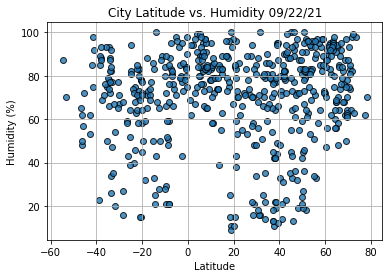

In [99]:
# Build the scatter plot for lat vs humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

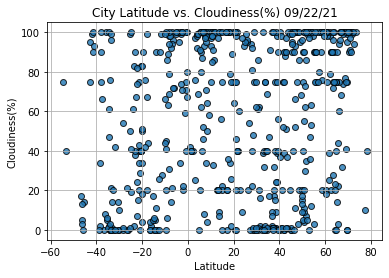

In [100]:
# Build the scatter plot for Cloudiness(%).
plt.scatter(lats,
            cloudiness,
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

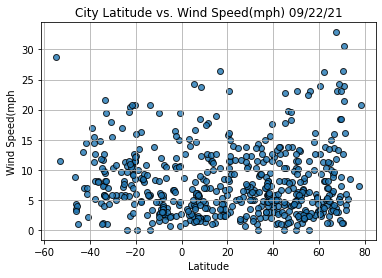

In [101]:
# Build the scatter plot for windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed(mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [102]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [103]:
index13 = city_data_df.loc[13]
index13

City                   Sao Filipe
Country                        CV
Date          2021-09-22 22:28:31
Lat                       14.8961
Lng                      -24.4956
Max Temp                    79.14
Humidity                       81
Cloudiness                     22
Wind Speed                   6.51
Name: 13, dtype: object

In [104]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

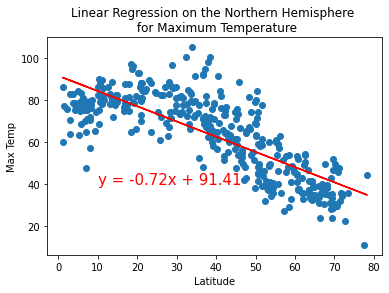

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

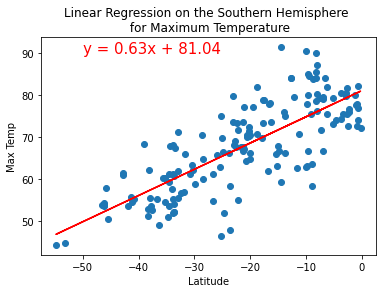

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

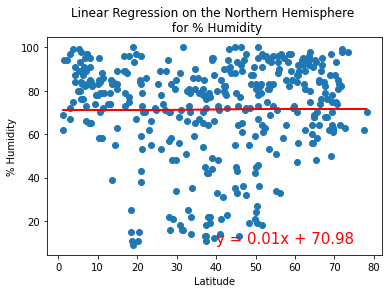

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

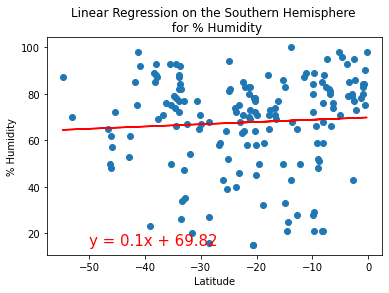

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", '% Humidity',(-50,15))

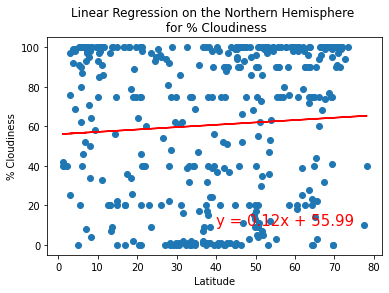

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

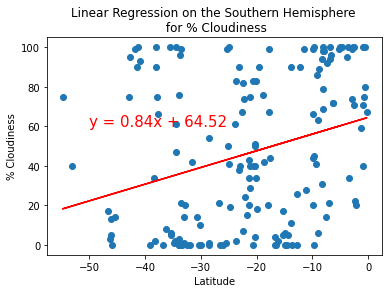

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

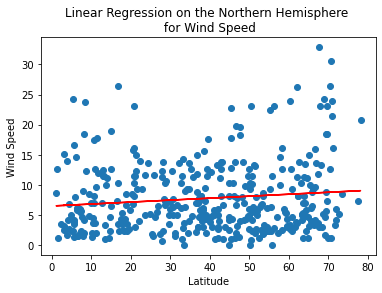

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))